# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 172.79,
        "lat": 3.07
    },
    "weather": [
        {
            "id": 501,
            "main": "Rain",
            "description": "moderate rain",
            "icon": "10n"
        }
    ],
    "base": "model",
    "main": {
        "temp": 77.14,
        "pressure": 1012,
        "humidity": 84,
        "temp_min": 77.14,
        "temp_max": 77.14,
        "sea_level": 1012,
        "grnd_level": 1013
    },
    "wind": {
        "speed": 2.93,
        "deg": 105
    },
    "rain": {
        "3h": 3.13
    },
    "clouds": {
        "all": 100
    },
    "dt": 1573504905,
    "sys": {
        "country": "KI",
        "sunrise": 1573496000,
        "sunset": 1573539154
    },
    "timezone": 43200,
    "id": 2110227,
    "name": "Butaritari",
    "cod": 200
}


In [8]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
         # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Cabo San Lucas
Processing Record 2 | Hithadhoo
Processing Record 3 | Bathsheba
Processing Record 4 | Kirakira
Processing Record 5 | Sitka
Processing Record 6 | Albany
City not found. Skipping...
Processing Record 7 | Hasaki
Processing Record 8 | Sindor
Processing Record 9 | Rikitea
Processing Record 10 | Aksarka
Processing Record 11 | Curup
Processing Record 12 | Port-Gentil
City not found. Skipping...
Processing Record 13 | Mar del Plata
Processing Record 14 | Jamestown
Processing Record 15 | Busselton
Processing Record 16 | Barrow
Processing Record 17 | Prince Rupert
Processing Record 18 | Norman Wells
Processing Record 19 | Flinders
Processing Record 20 | Avarua
Processing Record 21 | Naze
Processing Record 22 | Christchurch
Processing Record 23 | Tsogni
Processing Record 24 | Ushuaia
City not found. Skipping...
Processing Record 25 | Kathmandu
Processing Record 26 | Codrington
Processing Record 27 | Yloj

Processing Record 232 | Faya
Processing Record 233 | Clyde River
Processing Record 234 | Vasylivka
Processing Record 235 | Poum
Processing Record 236 | Maragogi
Processing Record 237 | Leshukonskoye
Processing Record 238 | Guanica
City not found. Skipping...
Processing Record 239 | Kalachinsk
Processing Record 240 | Kimbe
Processing Record 241 | Virden
Processing Record 242 | Kletskaya
Processing Record 243 | Okhotsk
Processing Record 244 | Denpasar
Processing Record 245 | Carutapera
Processing Record 246 | Solenzo
Processing Record 247 | Innisfail
Processing Record 248 | Kieta
Processing Record 249 | Koslan
City not found. Skipping...
Processing Record 250 | Manaus
Processing Record 251 | Souillac
Processing Record 252 | Sao Desiderio
Processing Record 253 | Dikson
Processing Record 254 | Zyryanka
Processing Record 255 | Alice Springs
Processing Record 256 | Kavieng
Processing Record 257 | Benguela
Processing Record 258 | Buala
Processing Record 259 | Shanhetun
Processing Record 260 |

Processing Record 460 | Sovetskiy
Processing Record 461 | Ambon
Processing Record 462 | Whitianga
Processing Record 463 | Ginda
Processing Record 464 | Vysha
Processing Record 465 | Merritt Island
Processing Record 466 | Ucluelet
City not found. Skipping...
Processing Record 467 | Patnos
City not found. Skipping...
Processing Record 468 | Mogadishu
Processing Record 469 | Balkhash
Processing Record 470 | Grand Gaube
Processing Record 471 | Aswan
Processing Record 472 | Khovu-Aksy
Processing Record 473 | Paamiut
Processing Record 474 | Iracoubo
Processing Record 475 | Abha
City not found. Skipping...
Processing Record 476 | Montgomery
Processing Record 477 | Neuquen
Processing Record 478 | Paita
Processing Record 479 | Barra
City not found. Skipping...
Processing Record 480 | Dashitou
Processing Record 481 | Dingle
Processing Record 482 | Esterhazy
Processing Record 483 | Yala
Processing Record 484 | Beyneu
City not found. Skipping...
Processing Record 485 | Ribeira Brava
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               581
Country            581
Date               581
Latitude           581
Longitude          581
Max Temperature    581
Humidity           581
Cloudiness         581
Wind Speed         581
dtype: int64

In [10]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,1573504993,22.89,-109.91,78.01,73,90,6.93
1,Hithadhoo,MV,1573504993,-0.60,73.08,81.84,78,64,11.74
2,Bathsheba,BB,1573504993,13.22,-59.52,84.20,70,40,16.11
3,Kirakira,SB,1573504994,-10.46,161.92,79.30,75,40,5.66
4,Sitka,US,1573504994,37.17,-99.65,26.01,46,100,15.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

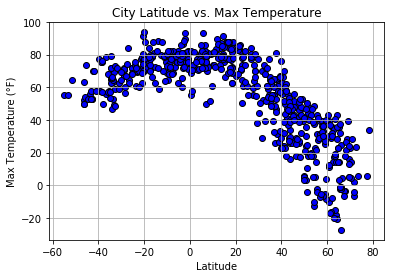

In [23]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

#### Latitude vs. Humidity Plot

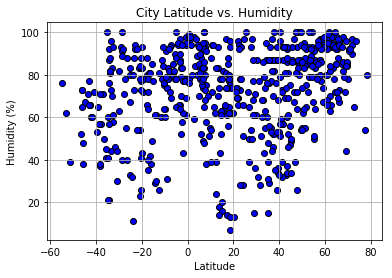

In [22]:

# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="blue", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

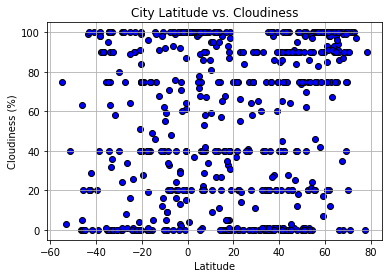

In [21]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

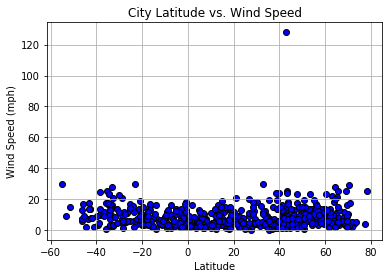

In [20]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()